In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from itertools import *
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.feature_selection import mutual_info_regression

from sklearn.datasets import make_classification, make_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from scipy import stats
from sklearn.metrics import classification_report


## Датасеты и обработка

In [3]:

#titanic = pd.read_csv("/kaggle/input/test-file/tested.csv")
#titanic = titanic.drop(columns=['Name','Cabin','Ticket'])
#titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
#titanic['Fare'] = titanic['Fare'].fillna(titanic['Age'].median())
#titanic = pd.get_dummies(titanic, dtype = int)
#titanic = titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']] # to show the magic
pd.set_option('future.no_silent_downcasting', True)
income = pd.read_csv("/kaggle/input/income-classification/income_evaluation.csv")
income = income.replace({' <=50K':0,' >50K':1, ' Male':1, ' Female': 2})
income_tr = income[' income']
income_sex =  income[' sex']
income = income.drop(columns=[' native-country', ' income',  ' sex', ' marital-status'])
income['  workclass']= income[' workclass'].replace({' State-gov':'gov', ' Self-emp-not-inc':'Self-emp', ' Federal-gov':'gov',
       ' Local-gov':'gov', ' Self-emp-inc':'Self-emp', ' Without-pay':'no work',
       ' Never-worked':'no work'})

income[' education'] = income[' education'].replace(
{' Bachelors': 'high', ' HS-grad':'HS', ' 11th':'HS','11th':'HS', ' Masters':'high', ' 9th':'low',
       ' Some-college':'high', ' Assoc-acdm':'high', ' Assoc-voc':'high', ' 7th-8th':'low',
       ' Doctorate':'high', ' Prof-school':'high', ' 5th-6th': 'low', ' 10th':'high', ' 1st-4th':'low',
       ' Preschool':'low', ' 12th':'HS'})


income[' relationship'] = income[' relationship'].replace({' Not-in-family':'Unmarried', ' Husband':'married', ' Wife':'married', ' Own-child':'child', ' Unmarried':'Unmarried',
       ' Other-relative':'Other'})


income = pd.get_dummies(income)
income[' sex'] = income_sex
income[' income'] = income_tr

marketing = pd.read_csv("/kaggle/input/marketing-campaign-positive-response-prediction/campaign_responses.csv")
marketing = marketing.replace({'No':1, 'Yes':2, 'Male':1, 'Female':0, 'Married':1, 'Single':2})
student = pd.read_csv("/kaggle/input/student-habits-vs-academic-performance/student_habits_performance.csv")
student = student.replace({'No':1, 'Yes':2, 'Female':1, 'Male':2})
student['diet_quality'] = student['diet_quality'].replace({'Fair':2, 'Good':3, 'Poor':1})
student['parental_education_level'] = student['parental_education_level'].replace({'Master':3, 'High School':1, 'Bachelor':2})
student['internet_quality'] = student['internet_quality'].replace({'Average':2, 'Poor':1, 'Good':3})
student = student.dropna()
person = pd.read_csv("/kaggle/input/extrovert-vs-introvert-behavior-data/personality_datasert.csv")
person = person.replace({'No':1, 'Yes':2, 'Extrovert':1, 'Introvert':0})
heart = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
heart2 = pd.read_csv("/kaggle/input/cardiovascular-disease-dataset/cardio_train.csv")
iris = pd.read_csv('/kaggle/input/iris/Iris.csv')
creditfraud = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
onlinefraud = pd.read_csv('/kaggle/input/online-payment-fraud-detection/onlinefraud.csv')
onlinefraud = onlinefraud.drop(columns=['nameOrig','nameDest','isFlaggedFraud']) 
bankruptcy = pd.read_csv('/kaggle/input/company-bankruptcy-prediction/data.csv')
b = bankruptcy['Bankrupt?']
bankruptcy = bankruptcy.drop(columns=['Bankrupt?']) 
bankruptcy['Bankrupt?'] = b

In [4]:

class Generator():

    def __init__(self, X, y, n_columns = 2):
       self.X = X
       self.y = y
       self.n_columns = n_columns # hiperparametr for generators witch split range of combination


    def split_list_by_chunks(self, data, n_columns):
        for i in range(0, len(data), self.n_columns ):
            yield data[i:i + self.n_columns]

    def multiply_gen(self, by=2, column_list=None): ## return np with annotation 
        combinations_list = []
        name_columns = self.X.columns if column_list == None else column_list
        for name_col in combinations(name_columns, by):
            combinations_list.append(name_col)
        
        combinations_list = self.split_list_by_chunks(combinations_list, self.n_columns )
        for seq in combinations_list:
            B = np.empty((len(seq),self.X.shape[0]))
            list_of_name = []
            for i, tup in enumerate(seq):
                A = np.ones(self.X.shape[0])
                list_of_name.append(f'multiply of - {" ".join(str(item) for item in tup)}')
                for col in tup:
                    A *= self.X[col].to_numpy()
                B[i] = A
            yield B, list_of_name
 

    def multiply(self, by=2, column_list=None, with_all_data=True):  ## return dataframe 
        combinations_list = []
        name_columns = self.X.columns if column_list == None else column_list
        for name_col in combinations(name_columns, by):
            combinations_list.append(name_col)      
        B = np.empty((len(combinations_list),self.X.shape[0]))
        list_of_name = []
        for i, tup in enumerate(combinations_list):
            A = np.ones(self.X.shape[0])
            list_of_name.append(f'multiply of - {" ".join(str(item) for item in tup)}')
            for col in tup:
                A *= self.X[col]
            B[i] = A
        df = pd.DataFrame(B.T, columns=list_of_name)
        if with_all_data:
            return pd.concat([df, self.X, self.y], axis=1)   
        else:     
            return df
        

    def devision_on_last_gen(self, by=3, column_list=None):
        combinations_list = []
        name_columns = self.X.columns if column_list == None else column_list
        for name_col in permutations(name_columns, by):
            combinations_list.append(name_col)
        combinations_list = self.split_list_by_chunks(combinations_list, self.n_columns )

        for seq in combinations_list:
            B = np.empty((len(seq),self.X.shape[0]))
            list_of_name = [] #'multiply and devision - '
            for i, tup in enumerate(seq):
                A = np.ones(self.X.shape[0])   
                list_of_name.append(f'multiply on - {" ".join(str(item) for item in tup[:-1])}, and devision on - {tup[-1]}')
                for col in tup:
                    A *= self.X[col].to_numpy()
                    A = A/(self.X[tup[-1]]*self.X[tup[-1]])
                B[i] = A
            yield B, list_of_name


         

    def devision_on_last(self, by=3, column_list=None, with_all_data=True):
        combinations_list = []
        name_columns = self.X.columns if column_list == None else column_list
        for name_col in permutations(name_columns, by):
            combinations_list.append(name_col)
            
        B = np.empty((len(combinations_list),self.X.shape[0]))
        list_of_name = []
        for i, tup in enumerate(combinations_list):
            A = np.ones(self.X.shape[0])
            list_of_name.append(f'multiply on - {" ".join(str(item) for item in tup[:-1])}, and devision on - {tup[-1]}')#.append(f'multiply of - {" ".join(str(item) for item in tup)}')
            for col in tup:
                A *= self.X[col]
                A = A/(self.X[tup[-1]]*self.X[tup[-1]])
                B[i] = A
        df = pd.DataFrame(B.T, columns=list_of_name)
        if with_all_data:
            return pd.concat([df, self.X, self.y], axis=1)   
        else:     
            return df
    
            
    def devision_in_pairs(self, column_list=None, with_all_data=True):
        combinations_list = []
        name_columns = self.X.columns if column_list == None else column_list
        for name_col in permutations(name_columns, 2):
            combinations_list.append(name_col)
        B = np.empty((len(combinations_list),self.X.shape[0]))
        list_of_name = []
        for i, tup in enumerate(combinations_list):
            list_of_name.append(f'{str(tup[0])} // {str(tup[1])}')
            A = X[tup[0]]/X[tup[1]]
            B[i] = A
        df = pd.DataFrame(B.T, columns=list_of_name)
        if with_all_data:
            return pd.concat([df, self.X, self.y], axis=1)   
        else:     
            return df
            


    def log(self, column_list=None):
        name_columns = self.X.columns if column_list == None else column_list
        for col in name_columns:
            X['log '+ str(col)] = np.log(X[col])    
        df = X
        return df
        

    def exp(self, column_list=None):
        name_columns = self.X.columns if column_list == None else column_list
        for col in name_columns:
            X['exp '+ str(col)] = np.exp(X[col])    
        df = X
        return df

    def degree(self, by=2, column_list=None, with_all_data=True):
        combinations_list = []
        name_columns = self.X.columns if column_list == None else column_list
        for name_col in permutations(name_columns, 2):
            combinations_list.append(name_col)
        B = np.empty((len(combinations_list),self.X.shape[0]))
        list_of_name = []
        for i, tup in enumerate(combinations_list):
            #print(tup[0])
            list_of_name.append(f'{str(tup[0])} ** {str(tup[1])}')
            A = X[tup[0]]**X[tup[1]]
            B[i] = A
        df = pd.DataFrame(B.T, columns=list_of_name)
        if with_all_data:
            return pd.concat([self.X, self.y], axis=1)   
        else:     
            return df

    def devision_on_last_2(self, by=3, column_list=None,  with_all_data=True):
        combinations_list = []
        name_columns = self.X.columns if column_list == None else column_list
        for name_col in combinations(name_columns, by-1):
            combinations_list.append(name_col)
        A = len(combinations_list)*(self.X.shape[1]-2)

        
        B = np.empty((A, self.X.shape[0]))
        list_of_name = []
        for i, tup in enumerate(combinations_list):
            A = np.ones(self.X.shape[0])
            dev_sub = [el for el in name_columns if el not in tup]

            for col in tup:
                A *= self.X[col]
                for dev in dev_sub:
                    list_of_name.append(f'multiply on - {" ".join(str(item) for item in tup)}, and devision on - {dev}')
                    A = A/self.X[dev]
                B[i] = A
        list_of_name  = list(dict.fromkeys(list_of_name))

        df = pd.DataFrame(B.T, columns=list_of_name)
        if with_all_data:
            return pd.concat([df, self.X, self.y], axis=1)   
        else:     
            return df

    def deltas(self, column_list=None,  with_all_data=True):
        # use with standart scaler or normalize data only
        name_columns = self.X.columns if column_list == None else column_list
        combinations_list = []
        for name_col in combinations(name_columns, 2):
            combinations_list.append(name_col)
        list_of_name = []
        B = np.empty((len(combinations_list),self.X.shape[0]))
        for i, tup in enumerate(combinations_list): 
            list_of_name.append(f'{str(tup[0])} - {str(tup[1])}')
            B[i] = self.X[tup[0]]-self.X[tup[1]]
        df = pd.DataFrame(B.T, columns=list_of_name) #?????
        if with_all_data:
            return pd.concat([df, self.X, self.y], axis=1)   
        else:     
            return df
        
    def sums():
        pass
  
        

class Correlations():
    def __init__(self, X, y):
        self.X = X #2d dimentional df
        self.y = y
    

    def mutual_info(self, mode='regression'):
        mi_dict = {}
        names_col = self.X.columns
        if mode == 'regression':
            v = mutual_info_regression(self.X, self.y)
        else:
             v = mutual_info_classif(self.X, self.y)
        
        for i, j in zip(names_col, v):
            mi_dict[i]=j

        mi_dict = dict(sorted(mi_dict.items(), key=lambda item: item[1]))
        return mi_dict


    def cramer_with_target(self):
        corr_val_crammer = {}
        for col in self.X.columns:
            confusion_matrix = pd.crosstab(self.X[col], self.y)
            chi2 = stats.chi2_contingency(confusion_matrix)[0]
            n = confusion_matrix.sum().sum()
            r, c = confusion_matrix.shape
            min_dim = min(r - 1, c - 1)
            v = np.sqrt(chi2 / (n * min_dim))
            corr_val_crammer['crammer with target ' + col]= v
        return corr_val_crammer


    def correlation(self, name='pearsonr'):
        corr_val = {}
        for col in self.X.columns:
            if name == 'pearsonr':
                res = stats.pearsonr(self.X[col], self.y)
            elif name == 'spearmanr': #Спирмен может быть полезна для нелинейных зависимостей.
                res = stats.spearmanr(self.X[col], self.y)
            elif name == 'kendalltau': #Кендалла, также используемой для ранговых данных
                res = stats.kendalltau(self.X[col], self.y)
            corr_val[col+' '+name] = res[0]
        return corr_val

    def heat_map(self):
        co_mtx = self.X.corr(numeric_only=True)
        w = co_mtx.shape[0]

        figure(figsize=(w, w), dpi=80)
        # Plot correlation heatmap
        sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)



    def corr_feature_analisys(self):
        cor_dict = {}
        names = self.X.columns
        combinations_list = []
        for name_col in combinations(names, 2):
            combinations_list.append(name_col)

        for pairs in combinations_list:
            stat, _ = stats.pearsonr(self.X[pairs[0]], self.X[pairs[1]])
            cor_dict[pairs] = stat
        cor_dict = sorted(cor_dict.items(), key=lambda item: item[1], reverse=True)
        cor_dict = dict(cor_dict)

        return cor_dict

    def vis_corr_feature_analisys(self):
        cor_dict = self.corr_feature_analisys()
        keys = [' '.join(el) for el in cor_dict.keys()]
        #print(keys[:3], type(keys[2]))
        #for el in cor_dict.keys():
         #   cor_dict ', '.join(el)
        vals = [float(v) for v in cor_dict.values()]#[float(cor_dict.values()) for k in keys]
        #print(vals, keys)
        w = len(keys)

        figure(figsize=(w, w), dpi=80)
        sns.catplot(x=vals, y=keys)
  
        
        
    def report_cor():
        #p = correlation()
        #s = correlation()
        #k= correlation()
        pass

    def visulisation():
        pass
        


In [10]:
df = Generator(heart[heart.columns[:-1]], heart['DEATH_EVENT']).multiply(by=2) ## add some chose

In [11]:
df

,multiply of - age anaemia,multiply of - age creatinine_phosphokinase,multiply of - age diabetes,multiply of - age ejection_fraction,multiply of - age high_blood_pressure,multiply of - age platelets,multiply of - age serum_creatinine,multiply of - age serum_sodium,multiply of - age sex,multiply of - age smoking,...,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.0,43650.0,0.0,1500.0,75.0,19875000.00,142.5,9750.0,75.0,0.0,...,0,20,1,265000.00,1.9,130,1,0,4,1
1,0.0,432355.0,0.0,2090.0,0.0,14484691.65,60.5,7480.0,55.0,0.0,...,0,38,0,263358.03,1.1,136,1,0,6,1
2,0.0,9490.0,0.0,1300.0,0.0,10530000.00,84.5,8385.0,65.0,65.0,...,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,5550.0,0.0,1000.0,0.0,10500000.00,95.0,6850.0,50.0,0.0,...,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,10400.0,65.0,1300.0,0.0,21255000.00,175.5,7540.0,0.0,0.0,...,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.0,3782.0,62.0,2356.0,62.0,9610000.00,68.2,8866.0,62.0,62.0,...,1,38,1,155000.00,1.1,143,1,1,270,0
295,0.0,100100.0,0.0,2090.0,0.0,14850000.00,66.0,7645.0,0.0,0.0,...,0,38,0,270000.00,1.2,139,0,0,271,0
296,0.0,92700.0,45.0,2700.0,0.0,33390000.00,36.0,6210.0,0.0,0.0,...,1,60,0,742000.00,0.8,138,0,0,278,0
297,0.0,108585.0,0.0,1710.0,0.0,6300000.00,63.0,6300.0,45.0,45.0,...,0,38,0,140000.00,1.4,140,1,1,280,0


In [12]:
df_gen = Generator(heart[heart.columns[:-1]], heart['DEATH_EVENT']).multiply(by=2)
def feature_gen(df_gen, target_name, threshold=0.1): 
   ## add some chose
    corr = Correlations(df_gen[df_gen.columns[:-1]], df_gen[target_name])
    cor_dict = corr.corr_feature_analisys()
    mi = corr.mutual_info()
    mi_lim = {k:v for k, v in mi.items() if v < threshold} # exclude columns with have a mu info with target less than 0.1
    mi_lim_ex = [col for col in mi_lim.keys() if col in df.columns]
    df_gen = df_gen.drop(columns=mi_lim_ex, axis=1)
    return df_gen

## Pipe for education and comparison

In [16]:
def train_test_scaller(df, name=''):
    
    y = df[name]
    X = df.drop([name], axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=99)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

def auto_trainer(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=13, max_depth=5, random_state=42).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    #y_pred_proba = clf.predict_proba(X_test[:2, :])
    clf.score(X_test, y_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf_matrix, annot=True)
    print('Report on test data')
    print(classification_report(y_test, y_pred))
    print('Report on train data')
    print(classification_report(y_train, y_pred_train))


#def feature_gen(df_inner, target_name, threshold=0.1): 
#    df = Generator(df_inner[df_inner.columns[:-1]], df_inner[target_name]).multiply(by=2) ## add some chose
#    corr = Correlations(df[df.columns[:-1]], df[target_name])
#    cor_dict = corr.corr_feature_analisys()
#    mi = corr.mutual_info()
#    mi_lim = {k:v for k, v in mi.items() if v < threshold} # exclude columns with have a mu info with target less than 0.1
#    mi_lim_ex = [col for col in mi_lim.keys() if col in df.columns]
#    df = df.drop(columns=mi_lim_ex, axis=1)
#    return df

#df_gen = Generator(heart[heart.columns[:-1]], heart['DEATH_EVENT']).multiply(by=2)
def feature_gen(df_gen, target_name, threshold=0.1): 
   ## add some chose
    corr = Correlations(df_gen[df_gen.columns[:-1]], df_gen[target_name])
    cor_dict = corr.corr_feature_analisys()
    mi = corr.mutual_info()
    mi_lim = {k:v for k, v in mi.items() if v < threshold} # exclude columns with have a mu info with target less than 0.1
    mi_lim_ex = [col for col in mi_lim.keys() if col in df.columns]
    df_gen = df_gen.drop(columns=mi_lim_ex, axis=1)
    return df_gen

def simple_pipe(df_inner, df_gen, target_name, threshold):
    ndf = feature_gen(df_gen, target_name, threshold)
    X_train, X_test, y_train, y_test = train_test_scaller(df_inner, name=target_name)
    print('W/O manipulations')
    auto_trainer(X_train, X_test, y_train, y_test)
    print('With manipulations')
    X_train, X_test, y_train, y_test = train_test_scaller(ndf, name=target_name)
    auto_trainer(X_train, X_test, y_train, y_test)


W/O manipulations
Report on test data
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        52
           1       0.74      0.74      0.74        23

    accuracy                           0.84        75
   macro avg       0.81      0.81      0.81        75
weighted avg       0.84      0.84      0.84        75

Report on train data
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       151
           1       0.97      0.85      0.91        73

    accuracy                           0.94       224
   macro avg       0.95      0.92      0.93       224
weighted avg       0.94      0.94      0.94       224

With manipulations
Report on test data
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        52
           1       0.83      0.65      0.73        23

    accuracy                           0.85        75
   macro avg       0.85      0

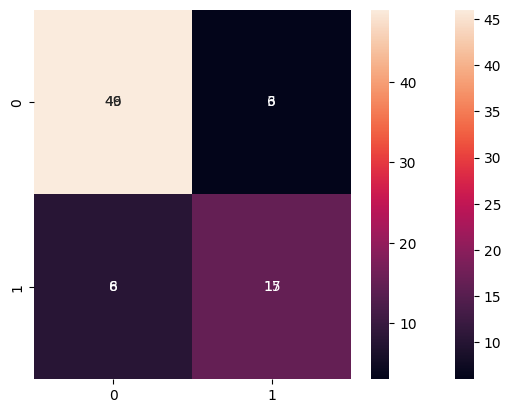

In [17]:
df_gen = Generator(heart[heart.columns[:-1]], heart['DEATH_EVENT']).multiply(by=2)
simple_pipe(heart, df_gen, 'DEATH_EVENT', 0.1)

Report on test data
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       342
           1       0.93      0.92      0.93       383

    accuracy                           0.92       725
   macro avg       0.92      0.92      0.92       725
weighted avg       0.92      0.92      0.92       725

Report on train data
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1067
           1       0.95      0.93      0.94      1108

    accuracy                           0.94      2175
   macro avg       0.94      0.94      0.94      2175
weighted avg       0.94      0.94      0.94      2175



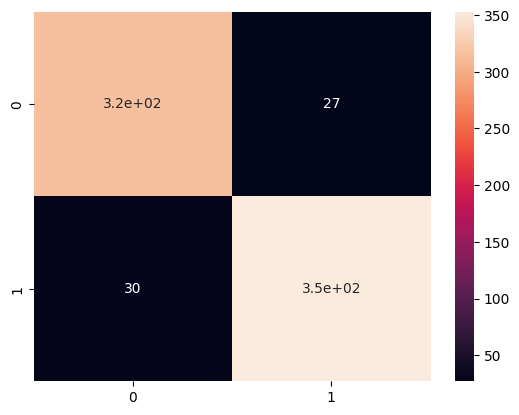

In [15]:
df = feature_gen(person, 'Personality')
X_train, X_test, y_train, y_test = train_test_scaller(df, name='Personality')
auto_trainer(X_train, X_test, y_train, y_test )

Report on test data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Report on train data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        21

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



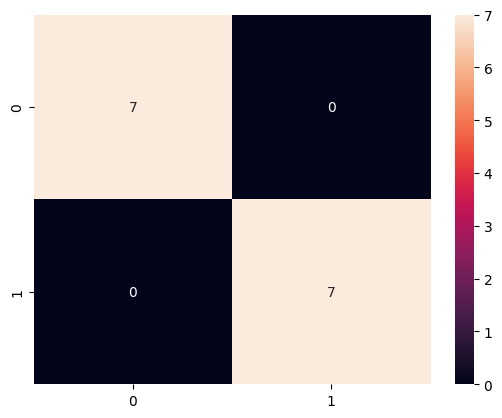

In [18]:
X_train, X_test, y_train, y_test = train_test_scaller(marketing, name='responded')
auto_trainer(X_train, X_test, y_train, y_test )

In [22]:
X_train, X_test, y_train, y_test = train_test_scaller(income, name=' income')
auto_trainer(X_train, X_test, y_train, y_test )

ValueError: could not convert string to float: ' Private'

In [24]:
income[' workclass'].unique()
' Without-pay':0
' Never-worked': 1

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [27]:
income[' education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [29]:
income['marital-status'] 
occupation 	relationship 	race native-country

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,2,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,2,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,2,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,1,0,0,20,United-States,0


In [ ]:
heart

In [28]:
income[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
gen = Generator(person[.columns[:-1]], heart['DEATH_EVENT'])
df = gen.multiply(by=2)
corr = Correlations(df[df.columns[:-1]], df['DEATH_EVENT'])
cor_dict = corr.corr_feature_analisys()
mi = corr.mutual_info()
mi_lim = {k:v for k, v in mi.items() if v < 0.1}
#cor_dict_limited = {k:v for k, v in cor_dict.items() if v > 0.4}
#df = df.drop(columns=set([k[0] for k in cor_dict_limited.keys()]), axis=1)
mi_lim_ex = [col for col in mi_lim.keys() if col in df.columns]
df = df.drop(columns=mi_lim_ex, axis=1)

In [32]:
#gen = Generator(titanic[['SibSp', 'Age','Pclass']], titanic['Survived'])
#df = gen.multiply()
#df = df.replace({np.NaN:0, np.inf:10e4})
#df.head(5)

In [37]:
X_train, X_test, y_train, y_test = train_test_scaller(titanic, name='Survived')

Report on test data
              precision    recall  f1-score   support

           0       0.65      0.82      0.72        67
           1       0.40      0.21      0.28        38

    accuracy                           0.60       105
   macro avg       0.52      0.52      0.50       105
weighted avg       0.56      0.60      0.56       105

Report on train data
              precision    recall  f1-score   support

           0       0.77      0.95      0.85       199
           1       0.85      0.51      0.64       114

    accuracy                           0.79       313
   macro avg       0.81      0.73      0.74       313
weighted avg       0.80      0.79      0.77       313



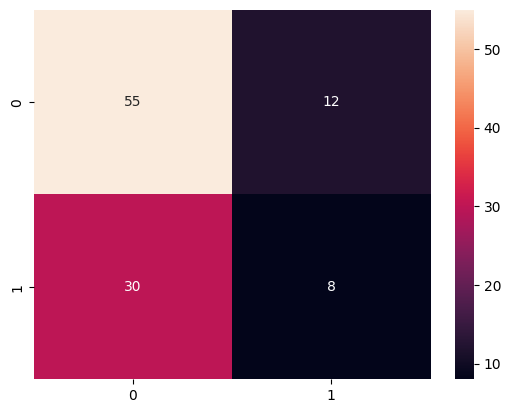

In [38]:
auto_trainer(X_train, X_test, y_train, y_test )

In [1]:
X_train, X_test, y_train, y_test = train_test_scaller(titanic, name='Survived')

NameError: name 'X_train' is not defined

# Education without extra feature

In [67]:
clf = RandomForestClassifier(n_estimators=13, max_depth=5, random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test[:2, :])
clf.score(X_test, y_test)

0.5714285714285714

## ON TEST data

<Axes: >

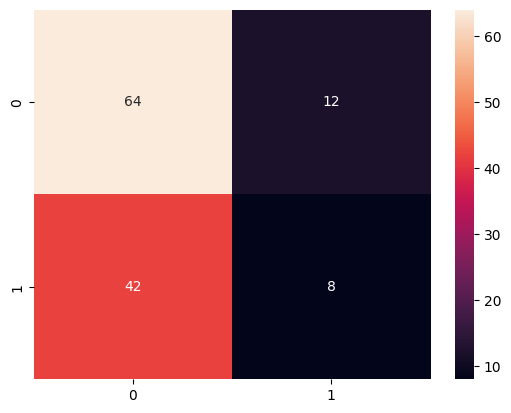

In [68]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.84      0.70        76
           1       0.40      0.16      0.23        50

    accuracy                           0.57       126
   macro avg       0.50      0.50      0.47       126
weighted avg       0.52      0.57      0.51       126



In [71]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5714285714285714

## ON TRAIN data

In [72]:
y_pred_train = clf.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       190
           1       0.72      0.43      0.54       102

    accuracy                           0.74       292
   macro avg       0.74      0.67      0.68       292
weighted avg       0.74      0.74      0.72       292



<Axes: >

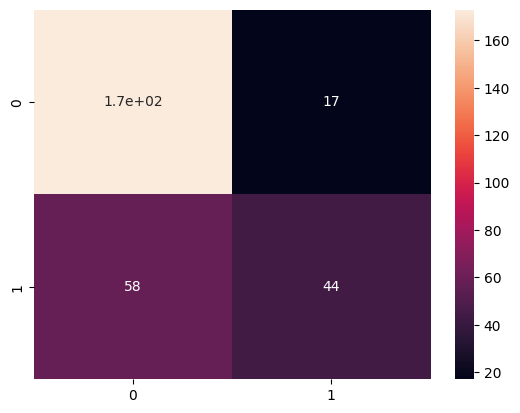

In [73]:
cf_matrix = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cf_matrix, annot=True)

In [74]:
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7431506849315068

# Education with extra feature

In [75]:
df.head(5)

,multiply of - SibSp Age,multiply of - SibSp Pclass,multiply of - Age Pclass,SibSp,Age,Pclass,Survived
0,0.0,0.0,103.5,0,34.5,3,0
1,47.0,3.0,141.0,1,47.0,3,1
2,0.0,0.0,124.0,0,62.0,2,0
3,0.0,0.0,81.0,0,27.0,3,0
4,22.0,3.0,66.0,1,22.0,3,1


In [76]:
df = df.replace([np.inf, -np.inf], 10e6)
X_train, X_test, y_train, y_test = train_test_scaller(df, name='Survived')

In [79]:
clf =  RandomForestClassifier(n_estimators=13, max_depth=5, random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test[:2, :])
clf.score(X_test, y_test)

0.5714285714285714

<Axes: >

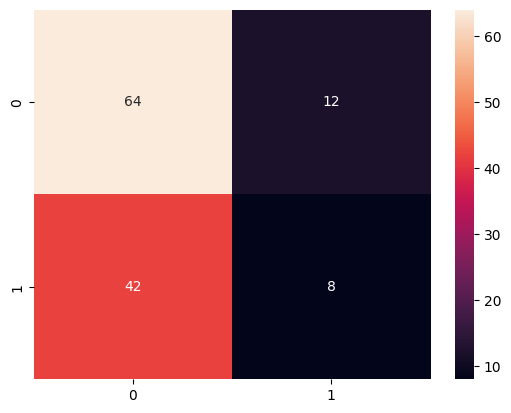

In [80]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5714285714285714

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.84      0.70        76
           1       0.40      0.16      0.23        50

    accuracy                           0.57       126
   macro avg       0.50      0.50      0.47       126
weighted avg       0.52      0.57      0.51       126



In [ ]:
df

In [99]:
heart.head(6)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1


In [100]:
heart.columns[:-1]

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [101]:
X_train, X_test, y_train, y_test = train_test_scaller(heart, name='DEATH_EVENT')

In [102]:
clf = RandomForestClassifier(random_state=9, max_depth=5, n_estimators=77).fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test[:2, :])
clf.score(X_test, y_test)

0.8666666666666667

<Axes: >

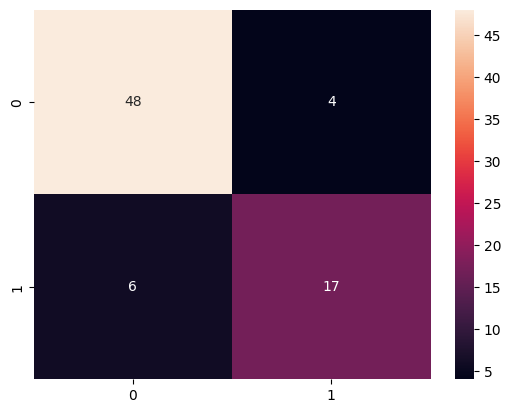

In [103]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.81      0.74      0.77        23

    accuracy                           0.87        75
   macro avg       0.85      0.83      0.84        75
weighted avg       0.86      0.87      0.86        75



In [105]:
X_train, X_test, y_train, y_test = train_test_scaller(df, name='DEATH_EVENT')

In [107]:
clf = RandomForestClassifier(random_state=9, max_depth=3, n_estimators=88).fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test[:2, :])
clf.score(X_test, y_test)

0.8666666666666667

In [ ]:
cf

<Axes: >

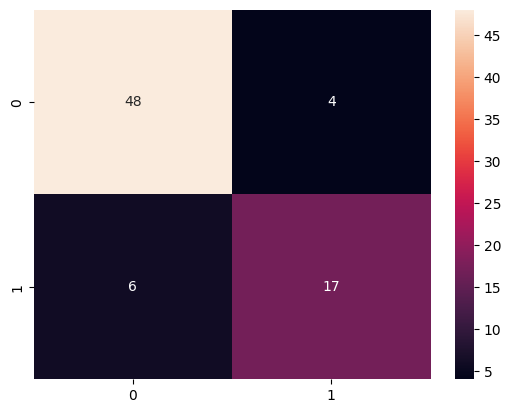

In [ ]:
_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.81      0.74      0.77        23

    accuracy                           0.87        75
   macro avg       0.85      0.83      0.84        75
weighted avg       0.86      0.87      0.86        75

